In [1]:
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

np.random.seed(42)
os.environ["PYTHONWARNINGS"] = "ignore::UserWarning"
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=UserWarning)

In [2]:
path = 'input/tradeTimeInfo.csv'

In [3]:
df = pd.read_csv(path).drop(columns='Unnamed: 0')
df.T

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
carid,68603.000000,12312.000000,57655.000000,45688.000000,52081.000000,6729.000000,766.000000,10453.000000,65800.000000,36776.000000,...,63059.000000,63469.000000,45307.000000,57147.000000,17286.000000,10177.000000,54312.000000,45597.000000,38629.000000,58619.000000
pushPrice,3.980000,4.500000,23.900000,20.579800,12.280000,18.500000,9.800000,10.800000,12.280000,16.800000,...,2.000000,11.800000,9.900000,11.380000,16.800000,22.880000,12.300000,15.380000,36.880000,39.380000
isTraded,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
predPrice,4.571188,5.326470,24.260490,26.192541,12.397629,16.249944,9.782567,11.366560,11.435832,17.419523,...,2.048355,12.571402,9.504020,11.201090,16.234233,21.471404,12.486524,15.236936,36.064669,35.530893
isCut,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
cutNum,0.000000,0.000000,1.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,2.000000
cutPrice1,3.980000,4.500000,23.000000,20.579800,11.900000,17.680000,9.800000,10.800000,12.280000,16.800000,...,2.000000,11.800000,9.900000,11.380000,16.400000,22.880000,12.300000,15.380000,36.600000,38.600000
cutPrice2,3.980000,4.500000,23.000000,20.579800,11.900000,17.879900,9.800000,10.800000,12.280000,16.800000,...,2.000000,11.800000,9.900000,11.380000,15.900000,22.880000,12.300000,15.380000,36.600000,38.000000
cutPrice3,3.980000,4.500000,23.000000,20.579800,11.900000,16.879900,9.800000,10.800000,12.280000,16.800000,...,2.000000,11.800000,9.900000,11.380000,15.700000,22.880000,12.300000,15.380000,36.600000,38.000000
dFirstCutTime,0.000000,0.000000,23.000000,0.000000,21.000000,27.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,5.000000,2.000000


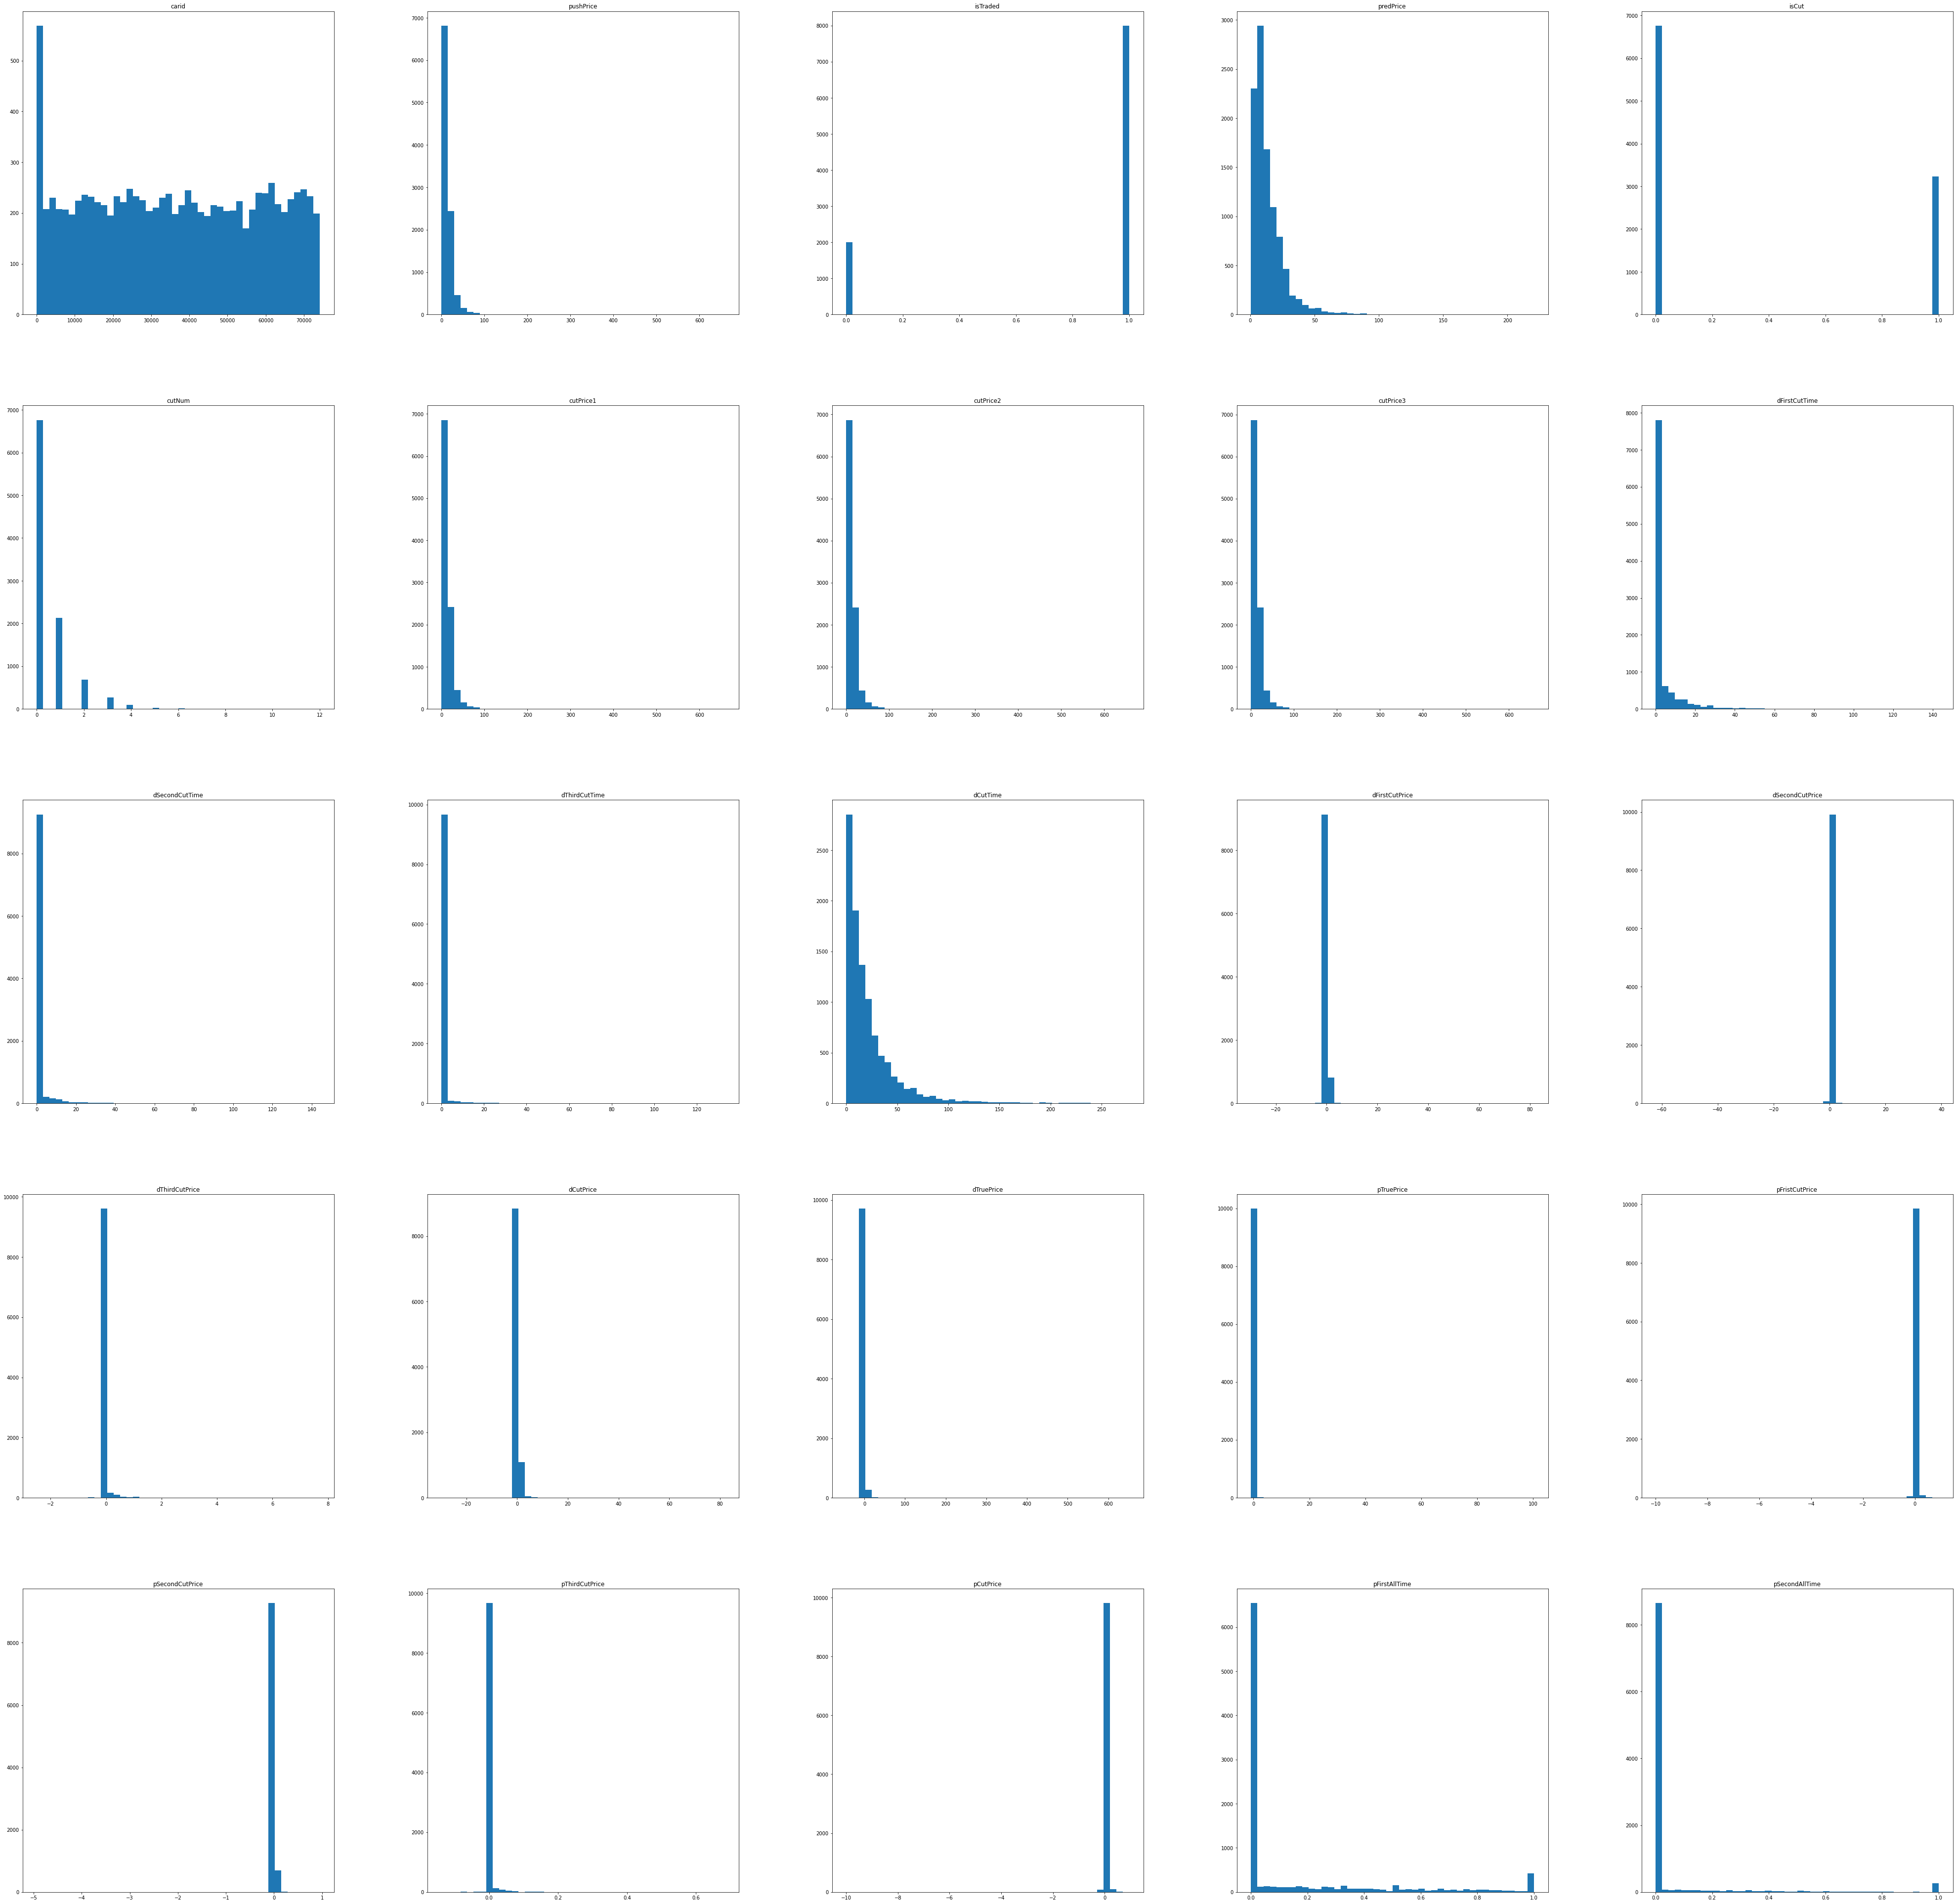

In [4]:
num_bins = int(np.floor(1+(3.3)*(np.log2(len(df)))))
_ = df.hist(column=df.columns, grid=False, figsize = (70, 70), bins=num_bins)

In [5]:
df = df[df['pTruePrice'] <= 0.5]

In [6]:
df['bins'] = pd.cut(df['dCutTime'], bins=int(np.floor(1+np.log2(len(df)))), labels=False)

In [7]:
df.describe()

,carid,pushPrice,isTraded,predPrice,isCut,cutNum,cutPrice1,cutPrice2,cutPrice3,dFirstCutTime,...,dCutPrice,dTruePrice,pTruePrice,pFristCutPrice,pSecondCutPrice,pThirdCutPrice,pCutPrice,pFirstAllTime,pSecondAllTime,bins
count,9941.000000,9941.000000,9941.00000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,...,9941.00000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000,9941.000000
mean,35953.736043,13.693116,0.79992,13.761224,0.322704,0.499346,13.552381,13.523318,13.506773,3.360628,...,0.19941,-0.068109,-0.014561,0.011813,0.002027,0.001534,0.016569,0.161220,0.059573,0.707172
std,22130.325995,13.203930,0.40008,12.853904,0.467534,0.907672,13.143366,13.140084,13.130555,8.778438,...,0.64095,1.824613,0.115006,0.109213,0.059958,0.013511,0.112057,0.287997,0.194822,1.341812
min,2.000000,0.100000,0.00000,0.505941,0.000000,0.000000,0.100000,0.100000,0.100000,0.000000,...,-29.80000,-44.752896,-0.901731,-10.000000,-4.936508,-0.138329,-10.000000,0.000000,0.000000,0.000000
25%,16654.000000,5.680000,1.00000,5.850724,0.000000,0.000000,5.650000,5.600000,5.600000,0.000000,...,0.00000,-0.598701,-0.065641,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,35507.000000,9.800000,1.00000,9.923029,0.000000,0.000000,9.680000,9.640000,9.600000,0.000000,...,0.00000,-0.070501,-0.007636,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55678.000000,17.800000,1.00000,17.808140,1.000000,1.000000,17.579900,17.500000,17.500000,2.000000,...,0.20000,0.432883,0.043575,0.012903,0.000000,0.000000,0.019048,0.210526,0.000000,1.000000
max,74156.000000,210.000000,1.00000,220.552896,1.000000,12.000000,210.000000,210.000000,210.000000,143.000000,...,10.90000,36.173124,0.496697,0.654545,0.423077,0.538462,0.700000,1.000000,1.000000,13.000000


In [8]:
x_feature = list(df.columns)
x_feature.remove('carid')
x_feature.remove('dCutTime')

y_feature = 'dCutTime'
y_bin = 'bins'

corr_feature = ['isTraded', 'dFirstCutTime', 'dSecondCutTime', 'dThirdCutTime', 'dCutTime', 'pFirstAllTime', 'pSecondAllTime', 'bins']

<font size=10> Data Visualization

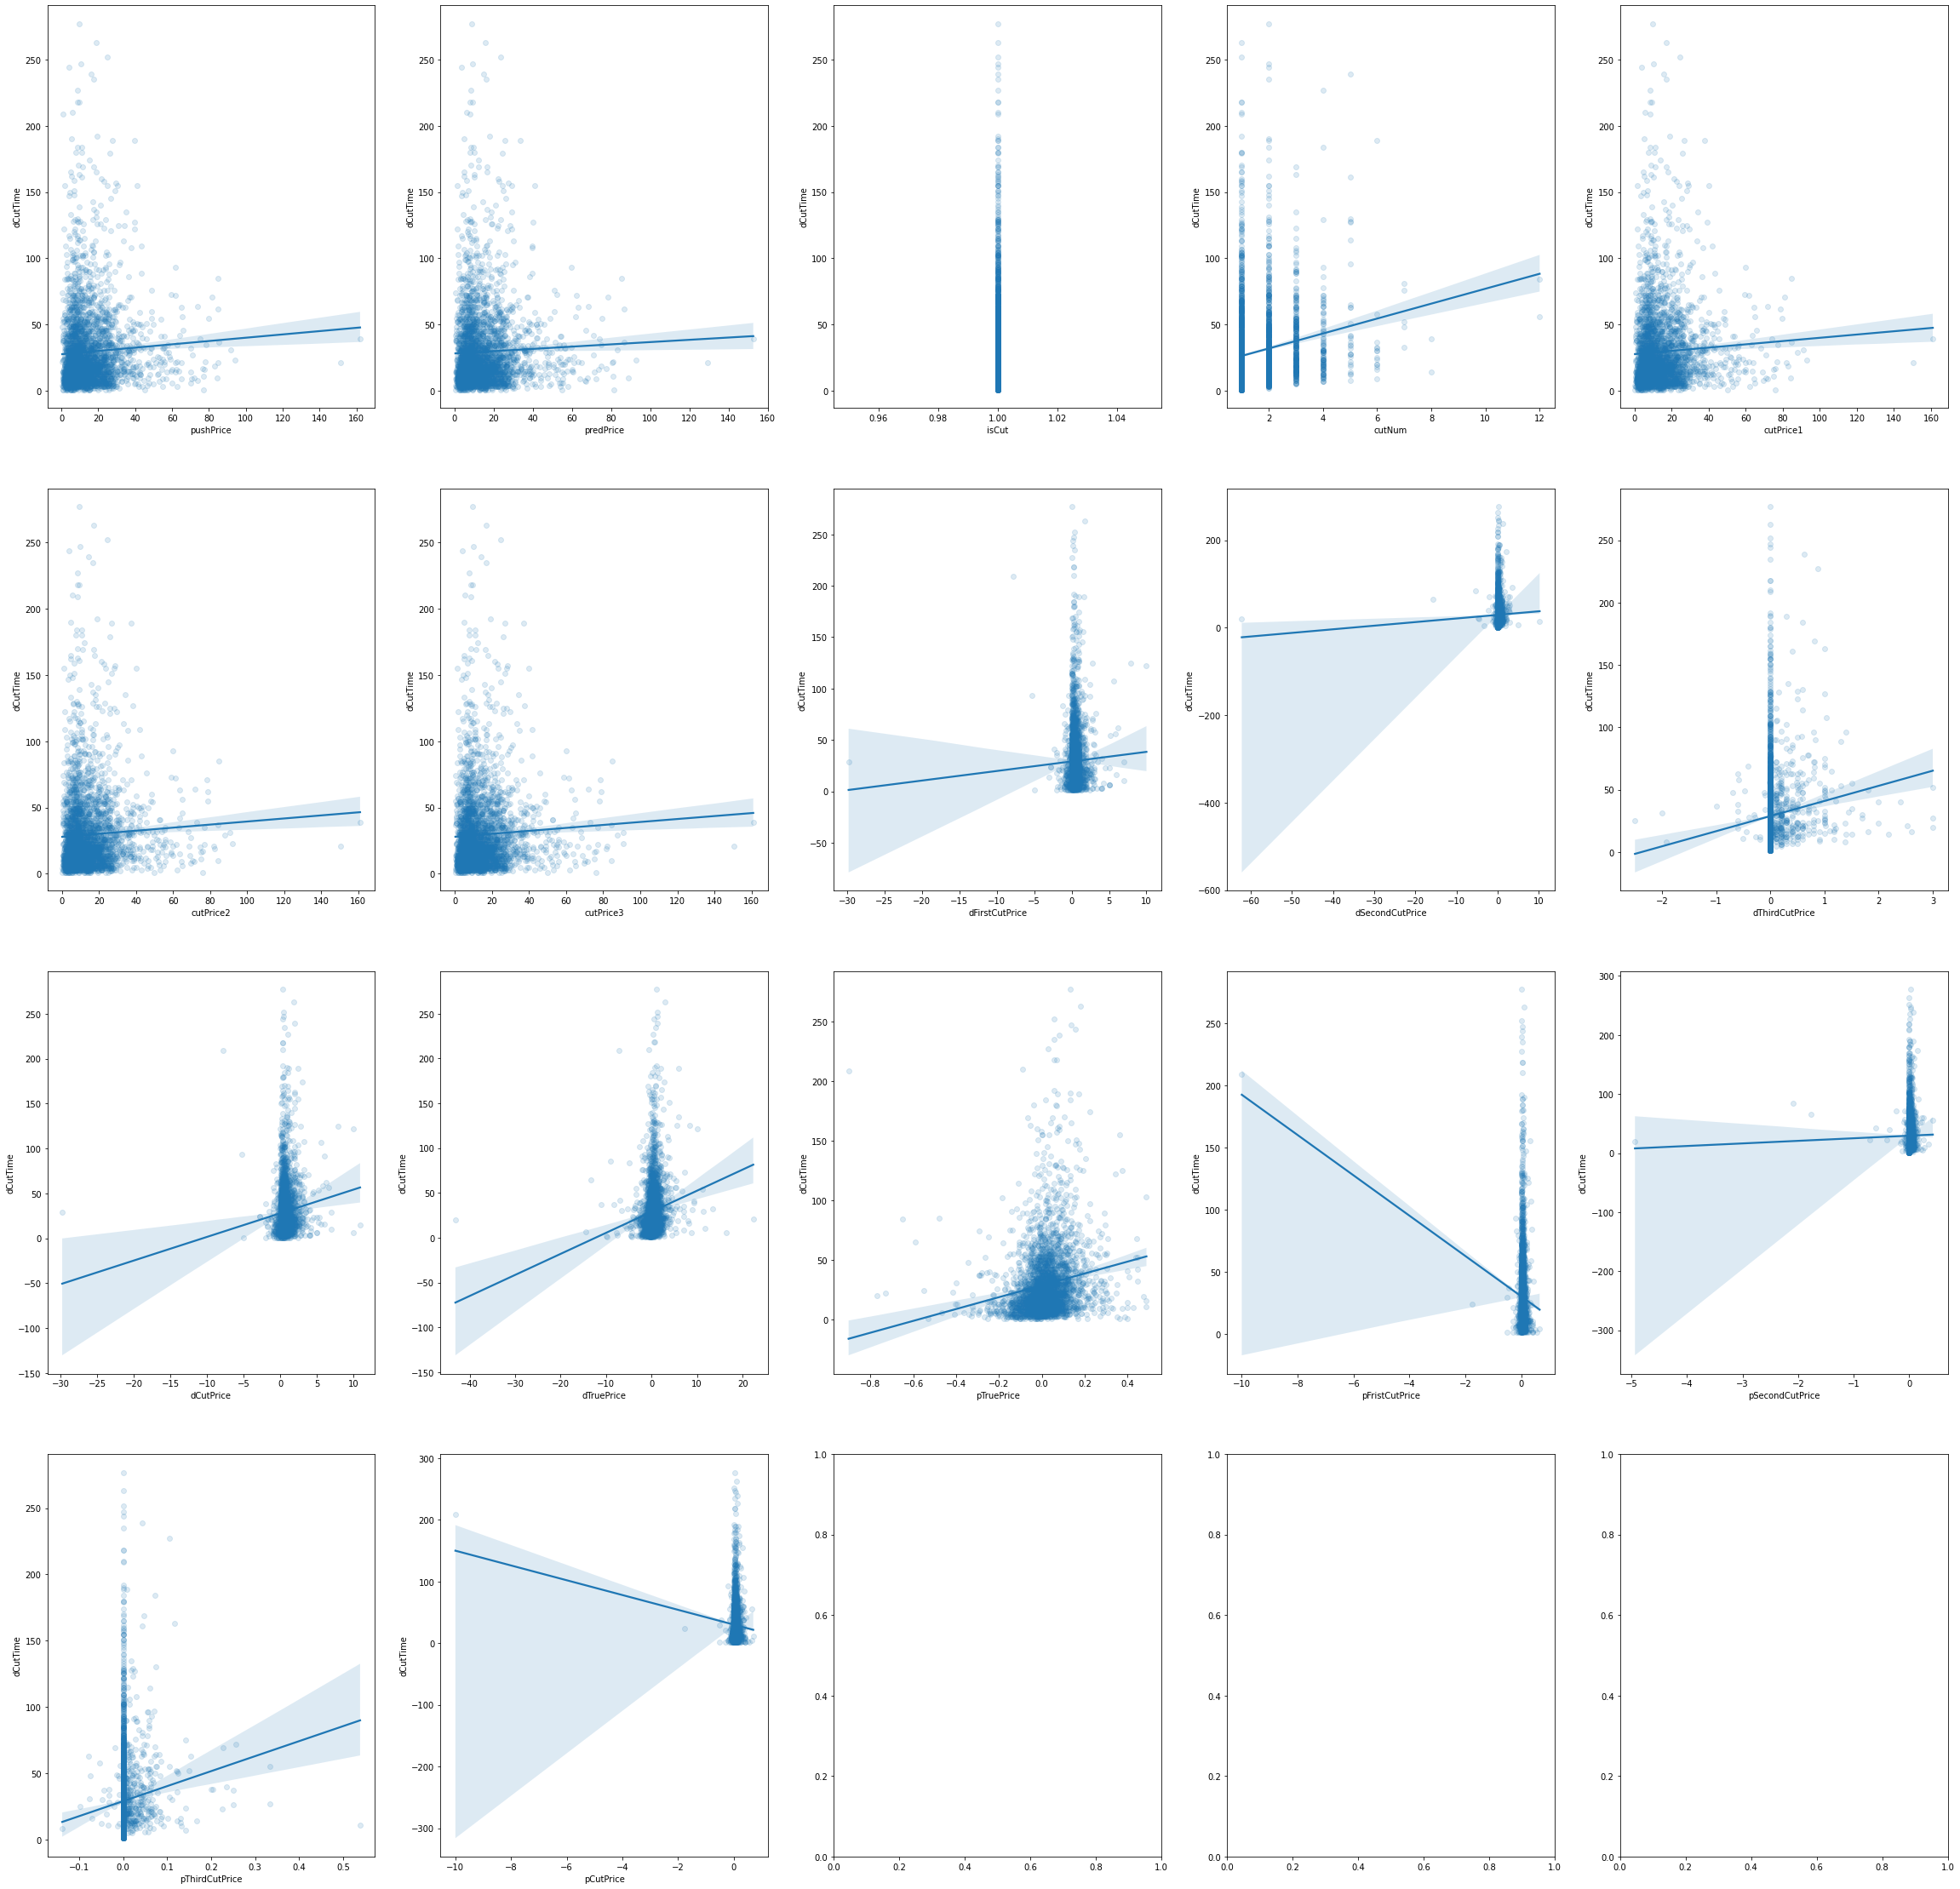

In [9]:
cut_df = df[df['isCut'] != 0]
fig, ax_arr = plt.subplots(4, 5, figsize=(40, 40))
i = 0
for feature in x_feature:
    if feature in corr_feature:
        continue
    sns.regplot(x = feature, y = y_feature, data=cut_df, ax = ax_arr[i // 5][i % 5], scatter_kws={'alpha': 0.15})
    i += 1

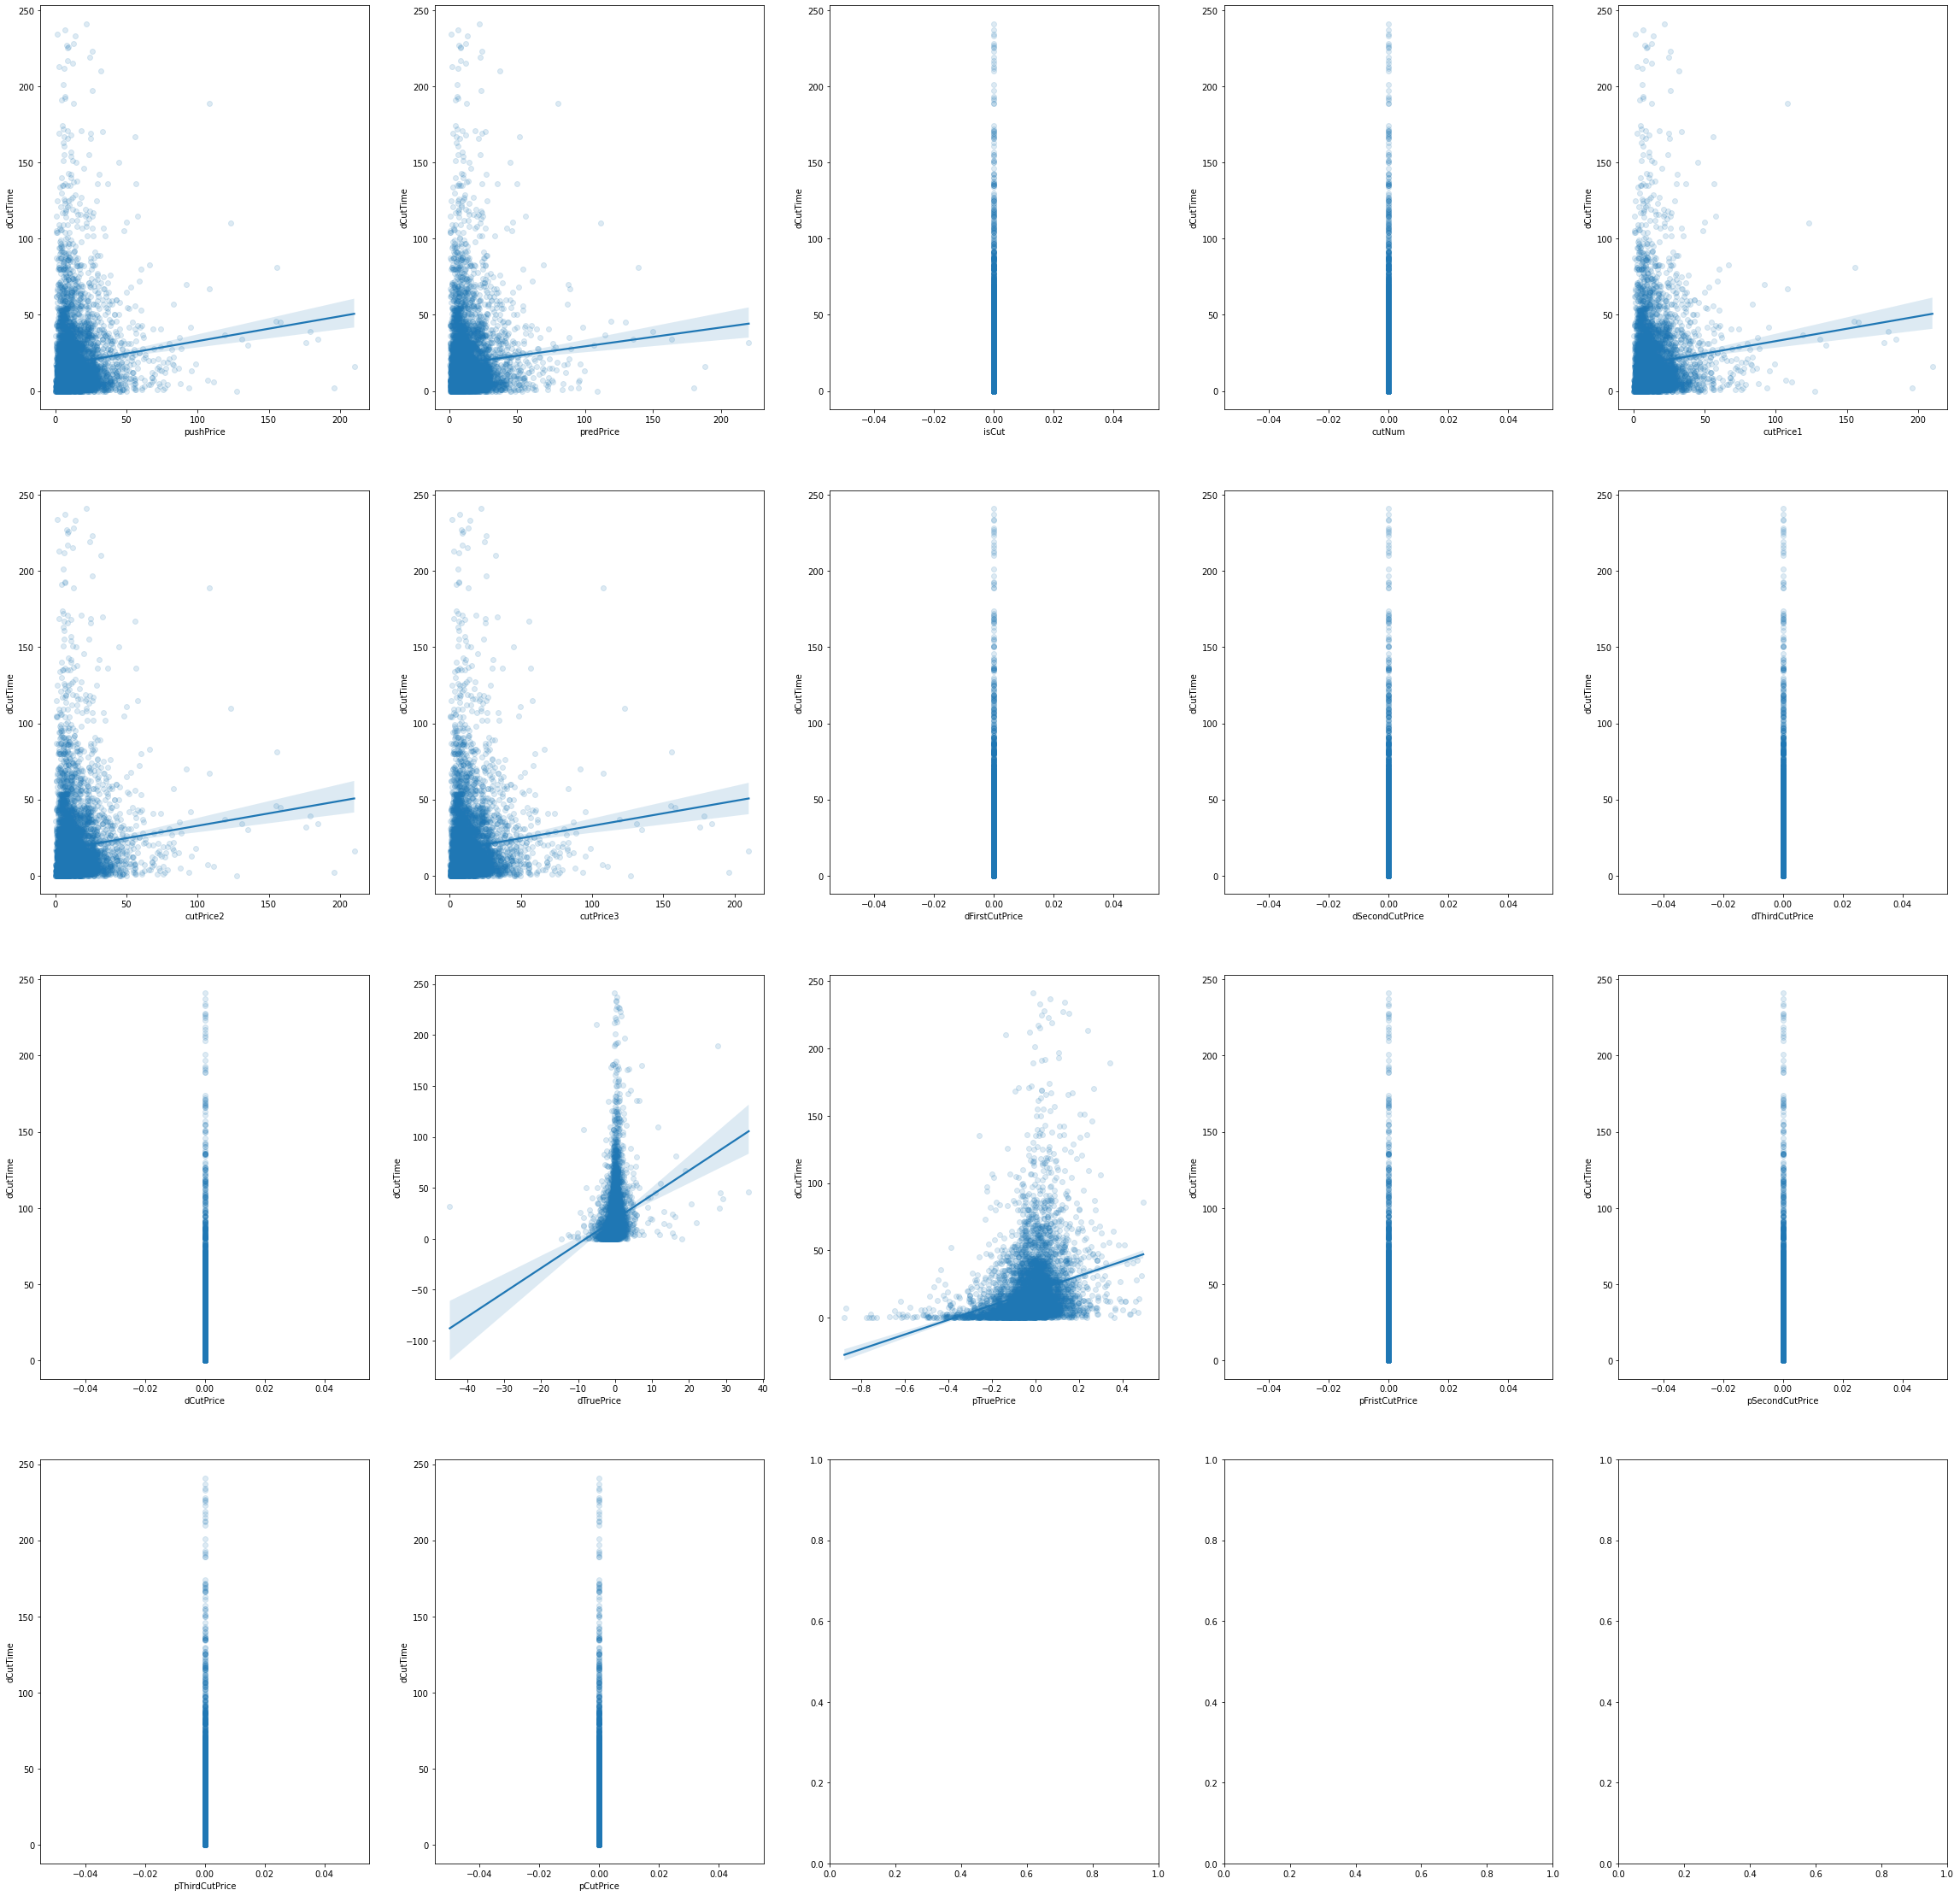

In [10]:
no_cut_df = df[df['isCut'] == 0]
fig, ax_arr = plt.subplots(4, 5, figsize=(40, 40))
i = 0
for feature in x_feature:
    if feature in corr_feature:
        continue
    sns.regplot(x = feature, y = y_feature, data=no_cut_df, ax = ax_arr[i // 5][i % 5], scatter_kws={'alpha': 0.15})
    i += 1

<font size=10> Correlation Analysis

In [11]:
corr_df = {'feature':[], 'p_corr': [], 'k_corr': [], 's_corr': []}

<font size=5> Person, Kendall, and Spearman Correlation Coefficient

In [12]:
for feature in x_feature:
    if feature in corr_feature:
        continue
    corr_df['feature'].append(feature)
    corr_df['p_corr'].append(df[feature].corr(df['dCutTime']))
    corr_df['k_corr'].append(df[feature].corr(df['dCutTime'], method='kendall'))
    corr_df['s_corr'].append(df[feature].corr(df['dCutTime'], method='spearman'))
    
corr_df = pd.DataFrame(corr_df).sort_values(by='p_corr', ignore_index=True, ascending = False)
corr_df

,feature,p_corr,k_corr,s_corr
0,pTruePrice,0.250334,0.251549,0.362841
1,cutNum,0.216528,0.241805,0.301033
2,isCut,0.186066,0.232473,0.281312
3,dTruePrice,0.177323,0.232746,0.338164
4,dCutPrice,0.133042,0.214606,0.278576
5,dThirdCutPrice,0.091784,0.127362,0.155522
6,dFirstCutPrice,0.085808,0.196906,0.257567
7,pThirdCutPrice,0.085054,0.127234,0.155403
8,pushPrice,0.082083,0.111125,0.163931
9,cutPrice1,0.078920,0.107332,0.158466


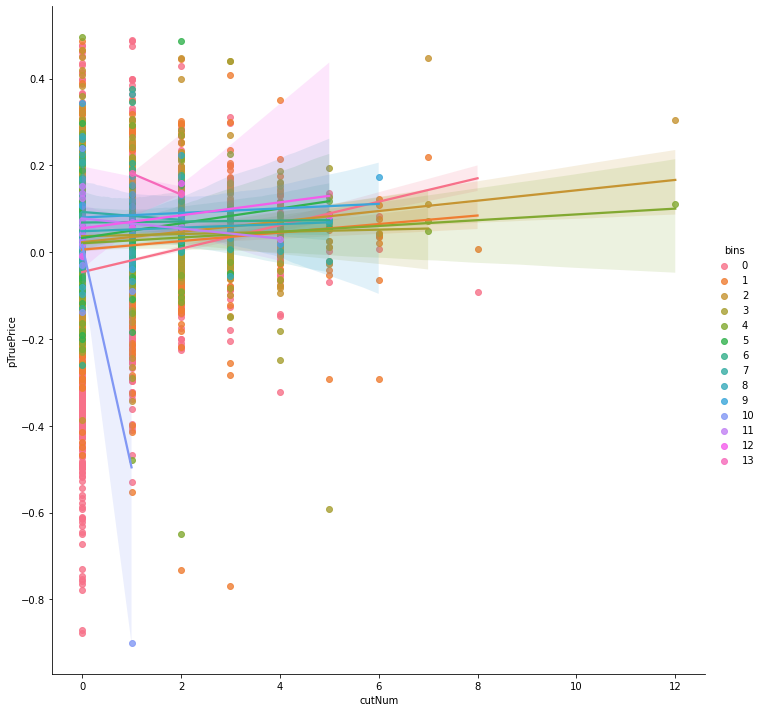

In [13]:
sns.lmplot(x = 'cutNum', y = 'pTruePrice', hue = 'bins', data=df, height=10)

In [14]:
discret_features = ['cutNum', 'isCut']
continu_features = list(set(x_feature) - set(corr_feature) - set(discret_features))
continu_features

['dSecondCutPrice',
 'cutPrice3',
 'predPrice',
 'pTruePrice',
 'pushPrice',
 'pFristCutPrice',
 'pCutPrice',
 'dTruePrice',
 'dThirdCutPrice',
 'cutPrice2',
 'cutPrice1',
 'pThirdCutPrice',
 'dFirstCutPrice',
 'dCutPrice',
 'pSecondCutPrice']

In [15]:
MI_df = {'feature':[], 'MI': []}

MI_disc = mutual_info_regression(df[discret_features].to_numpy(), df[y_feature].to_numpy(), discrete_features=True)
MI_cont = mutual_info_regression(df[continu_features].to_numpy(), df[y_feature].to_numpy(), discrete_features=False)

for i, mi in enumerate(MI_disc):
    MI_df['feature'].append(discret_features[i])
    MI_df['MI'].append(MI_disc[i])
for i, mi in enumerate(MI_cont):
    MI_df['feature'].append(continu_features[i])
    MI_df['MI'].append(MI_cont[i])
    
MI_df = pd.DataFrame(MI_df).sort_values(by='MI', ignore_index=True, ascending = False)
MI_df

,feature,MI
0,pTruePrice,0.079764
1,cutNum,0.063016
2,dTruePrice,0.061668
3,pCutPrice,0.052659
4,dFirstCutPrice,0.050081
5,dCutPrice,0.049515
6,pFristCutPrice,0.049055
7,isCut,0.046002
8,pSecondCutPrice,0.045411
9,dSecondCutPrice,0.039443
